# 過電流延時保護模擬 (ANSI 51)

本模擬為保護電驛邏輯實作：
- 電流超過閾值 (`threshold_current`) 時不立即動作
- 若超過時間 (`delay_time`) 持續發生 → 觸發跳脫

---

保護參數設定：
- 閾值：100A
- 延時：0.5 秒
- 取樣間隔：0.1 秒


# 第二格：參數設定 + 樣本電流資料


In [22]:
threshold_current = 100  # 閾值 (A)
delay_time = 0.4         # 延時 (s)
sample_interval = 0.1    # 取樣間隔 (s)

# 模擬電流樣本（你可以自由修改）
current_samples = [95, 105, 110, 150, 107, 98, 94]


# 第三格：邏輯判斷 + 跳脫動作模擬


In [23]:
overcurrent_duration = 0
trip_triggered = False

for idx, current in enumerate(current_samples):
    print(f"時刻 {idx}：電流 = {current} A")

    if current > threshold_current:
        overcurrent_duration += sample_interval
        print(f" ➜ 超載持續時間：{overcurrent_duration:.2f} 秒")
    else:
        overcurrent_duration = 0
        print(" ➜ 電流恢復正常，延時重置")

    if overcurrent_duration >= delay_time:
        trip_triggered = True
        print(" ⚡ 跳脫動作觸發！")
        break


時刻 0：電流 = 95 A
 ➜ 電流恢復正常，延時重置
時刻 1：電流 = 105 A
 ➜ 超載持續時間：0.10 秒
時刻 2：電流 = 110 A
 ➜ 超載持續時間：0.20 秒
時刻 3：電流 = 150 A
 ➜ 超載持續時間：0.30 秒
時刻 4：電流 = 107 A
 ➜ 超載持續時間：0.40 秒
 ⚡ 跳脫動作觸發！


# 第四格（可選）：電流走勢圖（用 matplotlib）


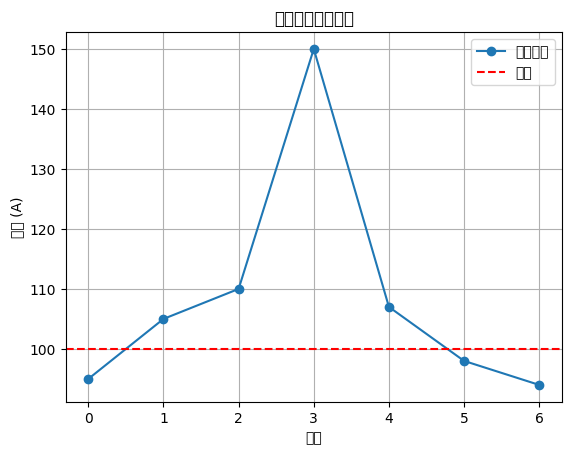

In [24]:
import matplotlib.pyplot as plt

plt.plot(current_samples, marker='o', label='電流樣本')
plt.axhline(y=threshold_current, color='r', linestyle='--', label='閾值')
plt.xlabel('時刻')
plt.ylabel('電流 (A)')
plt.title('過電流監控走勢圖')
plt.legend()
plt.grid(True)
plt.show()


# 後續筆記

這個問題問得非常關鍵，Hachi！讓我以「工程師教學模式」逐步拆解你提出的邏輯關係：電流樣本 → 判斷是否過載 → 計算持續時間。

---

📌 **核心概念：overcurrent_duration 是累加「持續超載的時間」**

在模擬程式裡，我們每次「取樣」電流的數值，就像保護電驛每 0.1 秒偵測一次電流變化。如果當次的 `current` 超過設定的 `threshold_current`（例如 100A），就代表目前處於「過載狀態」，因此要開始累積時間。

---

🔍 **程式中的換算步驟：**

假設我們取樣間隔為 `sample_interval = 0.1` 秒：

1. ✏️ 如果 `current = 105` 且 `threshold = 100`
   → 觸發判斷條件 `current > threshold_current`
   → 開始累加：`overcurrent_duration += 0.1` → 目前累積 0.1 秒

2. ✏️ 下一筆 `current = 110`
   → 再加 0.1 秒 → 累積到 0.2 秒

3. ✏️ 只要連續超過閾值，每取樣一次就加一次 `0.1 秒`

4. ✏️ 如果某一筆 `current = 97`（低於閾值）
   → 條件不成立 → `overcurrent_duration` 立即歸零

📌 **實務對應：**
這就是延時保護的邏輯——只有「持續性」異常才會跳脫，例如設定延時為 `0.5 秒`，當 `overcurrent_duration ≥ 0.5`，保護電驛才觸發。

---

🎯 **總結邏輯公式：**

```text
如果 current[i] > threshold_current：
    overcurrent_duration += sample_interval
否則：
    overcurrent_duration = 0
當 overcurrent_duration ≥ delay_time：
    觸發跳脫 trip
```

你也可以在 Jupyter Notebook 中加上輸出記錄 `overcurrent_duration` 的圖表，用折線圖清楚標示持續累積時間與跳脫點。

如果你有興趣，我可以幫你擴充這段模擬，讓它具備「事件記錄」、「警告訊號」或「Trip Log」的功能！⚙️📘 要不要我們下一步來做「動作紀錄表」？例如跳脫時間、判斷條件與操作對象？